In [7]:
import numpy as np, cv2

#연산에 필요한 이미지를 읽고 그레이 스케일로 변환
img1= cv2.imread('./img/robot_arm1.jpg')
img2= cv2.imread('./img/robot_arm2.jpg')
#그레이 스케일로 변환
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


#두 이미지의 절대 값 차연산
diff = cv2.absdiff(img1_gray, img2_gray)
print('diff :', diff)
# 차 영상을 극대화하기 위해 스레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1,255,cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2]  = 0


#두번째 이미지에 변화 부분표시
spot = cv2.bitwise_xor(img2, diff_red)
print('spot :',spot)

#결과 영상 출력
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('diff',diff)
cv2.imshow('spot',spot)
cv2.waitKey()
cv2.destroyAllWindows()

diff : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
spot : [[[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [246 246 246]
  ...
  [246 246 246]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [180 180 180]
  ...
  [180 180 180]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [161 161 161]
  ...
  [161 161 161]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [227 227 227]
  ...
  [227 227 227]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [3]:
import cv2
import numpy as np

img_fg = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('./img/girl.jpg')

# 알파 채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3],1,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#전경 영상 크기로 배경 영상에서 ROI잘라내기
img_fg =cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h , 10:10+w]

# 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)

# 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

#결과 영상 출력
cv2.imshow('mask',mask)
cv2.imshow('mask_inv',mask_inv)
cv2.imshow('masked_fg',masked_fg)
cv2.imshow('masked_bg',masked_bg)
cv2.imshow('added',added)
cv2.imshow('result',img_bg)
cv2.waitKey()
cv2.destroyAllWindows()

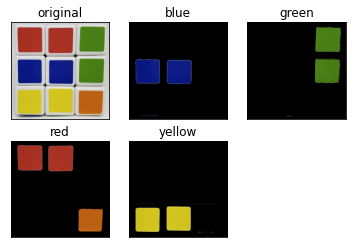

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img =cv2.imread('./img/cube.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#색상별 영역 지정
#빨강 165 ~ 180, 0~15
#초록 45~75
#파랑 90~120

blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255, 255])
green1 = np.array([45, 50, 50])
green2 = np.array([75, 255, 255])
red1 = np.array([0, 50, 50])
red2 = np.array([15,255, 255])
red3 = np.array([165, 50, 50])
red4 = np.array([180, 255, 255])
yellow1 = np.array([20, 50, 50])
yellow2 = np.array([35, 255, 255])

#색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1,blue2)
mask_green = cv2.inRange(hsv, green1,green2)
mask_red = cv2.inRange(hsv, red1,red2)
mask_red2 = cv2.inRange(hsv, red3,red4)
mask_yellow = cv2.inRange(hsv, yellow1,yellow2)

#색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask =mask_blue)
res_green = cv2.bitwise_and(img, img, mask =mask_green)
res_red1 = cv2.bitwise_and(img, img, mask =mask_red)
res_red2 = cv2.bitwise_and(img, img, mask =mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask =mask_yellow)


# 결과 출력
imgs = {'original':img, 'blue':res_blue,'green':res_green,
       'red':res_red, 'yellow':res_yellow}

#items은 key와 value를 같이 얻는 작업
# 그래서 (k,v)처럼 두개의 value 값을 넣어준다.
for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./img/man_chromakey.jpg')
img2 = cv2.imread('./img/street.jpg')
print('img1.shape[:2] :',img1.shape[:2])
print('img2.shape[:2] :',img2.shape[:2])

# ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2] #height1 400, width1 314
height2, width2 = img2.shape[:2] #height2 426, width1 640

#크로마 카 배경 영상에서 크로마 키가 있을 법한 영역을 10픽셀 정도로 지정
x = (width2 - width1)//2 
y = height2 - height1 
w = x + width1 
h = y + height1 
print('x :',x)
print('y :',y)
print('w :',w)
print('h :',h)

#크로마 키 배경 영상에서 크로마 키가 일을 법한 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20
print('chromakey :',chromakey)

#크로마 키영역과 영상 전체를HSV로변경 
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
print('hsv_chroma :',hsv_chroma)
print('hsv_img :',hsv_img)

#크로마 키 영역의 H 값에서 offset만큼 여유를 두어서 범위 지정
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100,100])
upper = np.array([chroma_h.max()+offset, 255,255])
print('chroma_h :',chroma_h)
print('lower :',lower)
print('upper :',upper)

#마스크 생성 밑 마스킹후 합성
mask = cv2.inRange(hsv_img,lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1,img1,mask = mask_inv)
bg = cv2.bitwise_and(roi,roi,mask=mask)
img2[y:h, x:w] = fg + bg
print('mask :',mask)
print('mask_inv :',mask_inv)
print('roi :',roi)
print('fg :',fg)
print('bg :',bg)
print('img2 :',img2)


#결과 출력
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

img1.shape[:2] : (400, 314)
img2.shape[:2] : (426, 640)
x : 163
y : 26
w : 477
h : 426
chromakey : [[[ 97 210  59]
  [ 96 209  58]
  [ 96 209  58]
  [ 96 209  58]
  [ 96 209  58]
  [ 97 210  59]
  [ 96 209  58]
  [ 96 209  58]
  [ 97 210  59]
  [ 97 210  59]]

 [[ 96 209  58]
  [ 96 209  58]
  [ 95 208  57]
  [ 95 208  57]
  [ 96 209  58]
  [ 96 209  58]
  [ 96 209  58]
  [ 96 209  58]
  [ 97 210  59]
  [ 97 210  59]]

 [[ 97 210  59]
  [ 96 209  58]
  [ 96 209  58]
  [ 96 209  58]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]]

 [[ 96 209  58]
  [ 96 209  58]
  [ 95 208  57]
  [ 95 208  57]
  [ 96 209  58]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]
  [ 97 210  59]]

 [[ 95 208  57]
  [ 94 207  56]
  [ 94 207  56]
  [ 94 207  56]
  [ 95 208  57]
  [ 96 209  58]
  [ 96 209  58]
  [ 96 209  58]
  [ 97 210  59]
  [ 97 210  59]]

 [[ 96 208  60]
  [ 95 207  59]
  [ 95 207  59]
  [ 95 207  59]
  [ 96 208  60]
  [ 97 209 